In [2]:
import sys
if not '..' in sys.path:
    sys.path.append('..')
from analysis import collection, analysis, emg
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from joblib import dump, load

%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams.update({'axes.labelsize': 16})

image_path = Path("/Users/spencer/phd/phd/images/")

In [3]:
collection_name = "emg_olympics"
task_name = "center_hold"
c = collection.Collection(collection_name)
subjects = c.alphabetically_sorted_subjects()

In [4]:
for i, subject in enumerate(subjects):
    if subject.name == "georgia":
        print(i)

16


In [3]:
subject_hits = []
for subject in subjects:
    hits = 0
    for s in subject.tasks[task_name].sorted_sessions():
        for t in s.sorted_trials():
            if t.outcome == "Hit":
                hits += 1
    subject_hits.append(hits)
hit_fractions = [sh/540 for sh in subject_hits]

In [59]:
form_responses = pd.read_csv("~/motor-control/data/csv/form_responses.csv",parse_dates=["timestamp"])

In [5]:
trajectory_df = pd.read_pickle("trajectory_dataframe.pkl")

In [6]:
trajectory_df

0         1    reward
subject block target time                              
0       0     1      0     0.343222 -0.082905  0.661990
                     1     0.358024 -0.070899  0.645879
                     2     0.373063 -0.057852  0.629600
                     3     0.388132 -0.044123  0.613457
                     4     0.403032 -0.030089  0.597726
...                             ...       ...       ...
45      44    12     154   0.693029 -0.405245  0.200742
                     155   0.729362 -0.416387  0.163617
                     156   0.762247 -0.424639  0.131491
                     157   0.791030 -0.430207  0.105391
                     158   0.815206 -0.433338  0.086291

[7820997 rows x 3 columns]

0.5


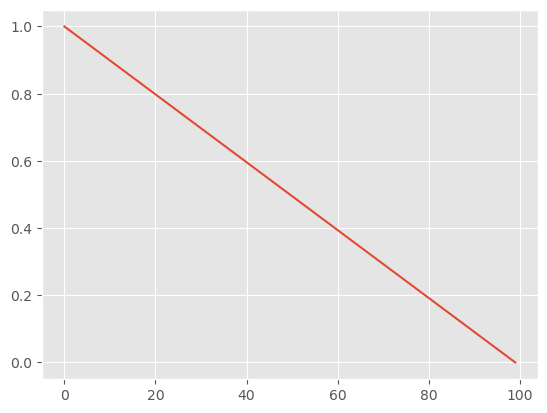

In [7]:
X = np.row_stack([np.zeros(100), np.linspace(0,1,100,endpoint=True)])
reward = np.linalg.norm(X - np.array([[0],[1]]),axis=0)
print(reward.mean())
plt.plot(reward)

In [8]:
subject_rewards = 1 / trajectory_df.groupby(level=['subject']).mean()["reward"]

In [9]:
# highest reward, hit fraction
subjects[subject_rewards.argmax()].name, subjects[np.argmax(hit_fractions)].name

('morio', 'morio')

In [81]:
def linear_fit(x_data, y_data):
    result = sp.stats.linregress(x_data, y_data)
    return result

def plot_linear_fit(x, result, ax):
    ax.plot(x, result.intercept + result.slope*x,"--", color="tab:red", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")

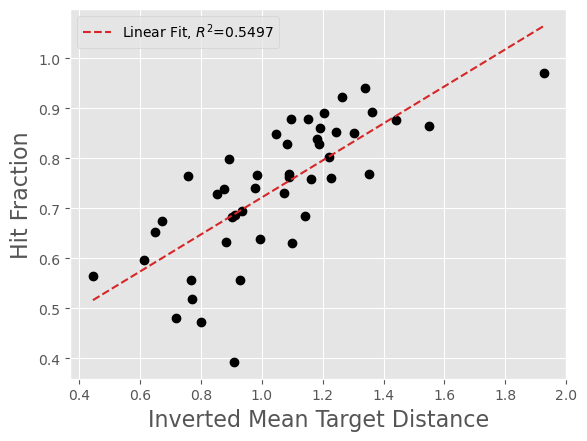

In [84]:
plt.plot(subject_rewards, hit_fractions,"ko")
x = np.linspace(subject_rewards.min(),subject_rewards.max(),100)
r = linear_fit(subject_rewards, hit_fractions)
plot_linear_fit(x,r,plt.gca())
plt.xlabel("Inverted Mean Target Distance")
plt.ylabel("Hit Fraction")
plt.legend()

In [60]:
form_responses

,name,sex,handedness,arm size,timestamp,caffeine,sleep,sports,dexterity
0,aeron,male,NaN,NaN,2021-10-03 15:40:57,True,6.5,True,True
1,alba,female,NaN,NaN,2021-09-21 15:56:43,False,7.0,True,False
2,andrei,male,right,30.0,2021-09-30 13:07:12,True,7.0,False,False
3,andy,male,NaN,NaN,2021-09-30 12:36:32,True,6.5,False,False
4,april,female,right,24.0,2021-09-20 20:35:38,False,7.0,False,False
5,arthur,male,NaN,NaN,2021-10-16 14:55:43,False,7.0,False,False
6,billy,male,NaN,NaN,2021-10-27 16:26:04,False,8.0,True,False
7,bob,male,right,28.0,2021-09-16 15:44:12,False,9.0,False,True
8,chiyu,male,left,27.0,2021-10-04 17:21:16,False,7.0,False,False
9,clem,female,NaN,NaN,2021-10-18 19:12:15,True,8.0,False,True


In [61]:
# get subjects with no missing responses
form_responses[form_responses.notna().all(True)]

,name,sex,handedness,arm size,timestamp,caffeine,sleep,sports,dexterity
2,andrei,male,right,30.0,2021-09-30 13:07:12,True,7.0,False,False
4,april,female,right,24.0,2021-09-20 20:35:38,False,7.0,False,False
7,bob,male,right,28.0,2021-09-16 15:44:12,False,9.0,False,True
8,chiyu,male,left,27.0,2021-10-04 17:21:16,False,7.0,False,False
10,dammy,male,right,31.0,2021-10-02 12:48:00,True,8.5,True,False
12,egzona,female,right,26.0,2021-11-02 14:04:28,False,6.0,True,False
13,elena,female,right,23.0,2021-10-20 16:01:10,True,4.5,False,False
14,emmett,male,right,28.0,2021-10-01 12:44:16,True,7.5,True,False
15,fede,male,right,27.0,2021-10-01 14:24:24,False,8.0,False,False
18,holly,female,right,22.2,2021-09-21 14:17:18,False,7.5,False,False


Text(0.5, 1.0, 'Reported Sleep [hr]')

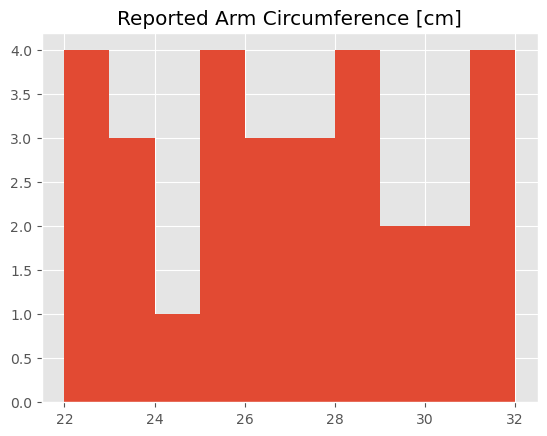

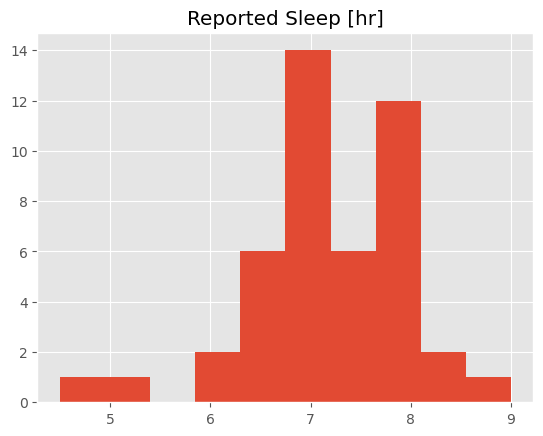

In [13]:
fig, ax = plt.subplots()
ax.hist(form_responses[form_responses["arm size"].notna()]["arm size"])
ax.set_title("Reported Arm Circumference [cm]")

fig, ax = plt.subplots()
ax.hist(form_responses[form_responses["sleep"].notna()]["sleep"])
ax.set_title("Reported Sleep [hr]")

In [14]:
def column_match(df, column, query):
    return df.loc[df[column] == query]

In [15]:
num_male = column_match(form_responses,"sex","male").shape[0]
num_female = column_match(form_responses,"sex","female").shape[0]
print(num_male, num_female, num_female+num_male)
# form_responses.loc[(form_responses["sex"] != "female") & (form_responses["sex"] != "male")]

29 17 46


In [76]:
timestamps = form_responses["timestamp"][form_responses["timestamp"].notna()].sort_values()
time_order = timestamps.index

In [102]:
def plot_column_rewards(col,fit=True):
    vals = form_responses[col][form_responses[col].notna()]
    plt.plot(vals,subject_rewards[vals.index],"ko")
    plt.xlabel(col)
    plt.ylabel("reward")
    if fit == True:
        x = np.linspace(vals.min(),vals.max(),100)
        r = linear_fit(vals, subject_rewards[vals.index])
        plot_linear_fit(x,r,plt.gca())
        plt.legend()

Text(0.5, 1.0, 'rewards')

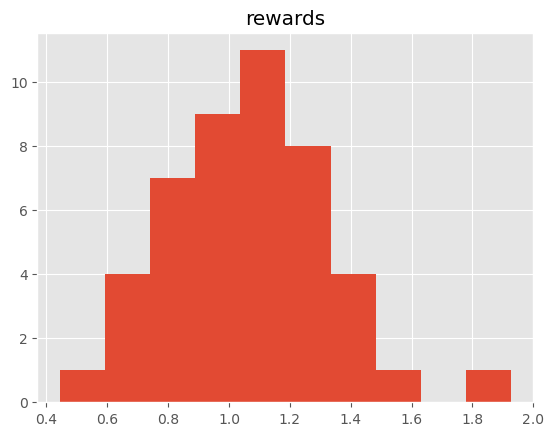

In [103]:
plt.hist(subject_rewards)
plt.title("rewards")

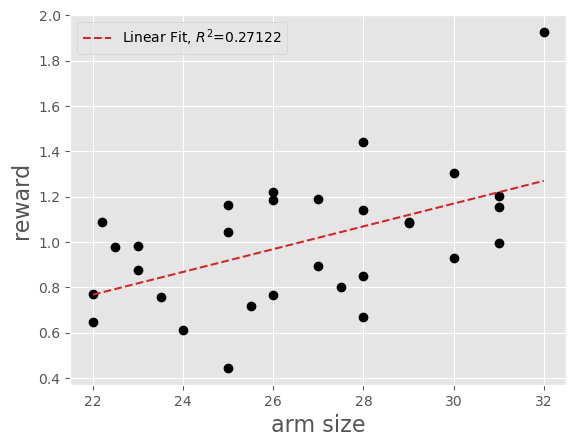

In [104]:
plot_column_rewards("arm size")

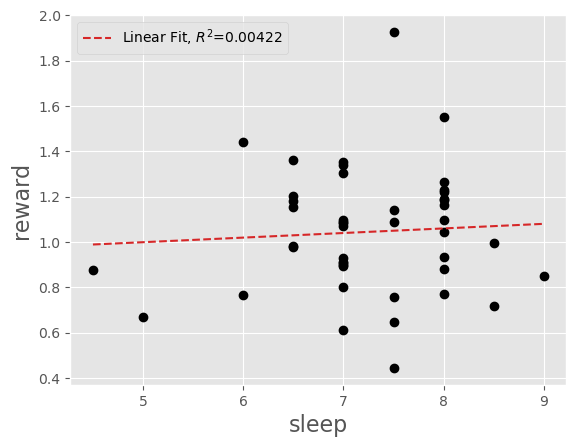

In [105]:
plot_column_rewards("sleep")

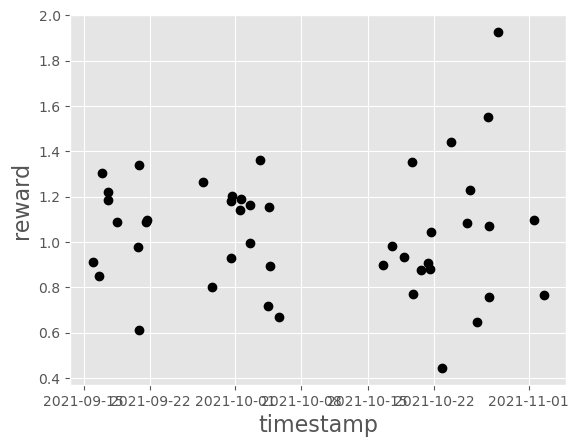

In [106]:
plot_column_rewards("timestamp",fit=False)

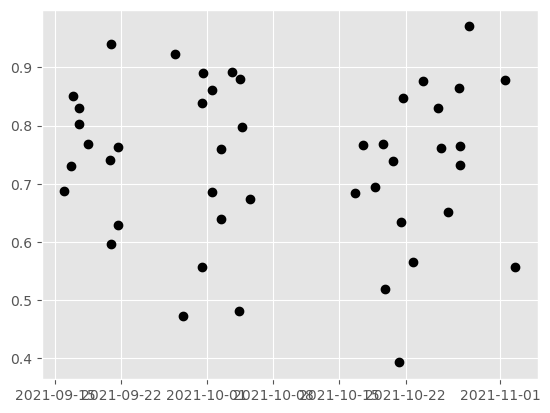

In [77]:
plt.plot(timestamps, [hit_fractions[i] for i in time_order.to_list()],'ko')

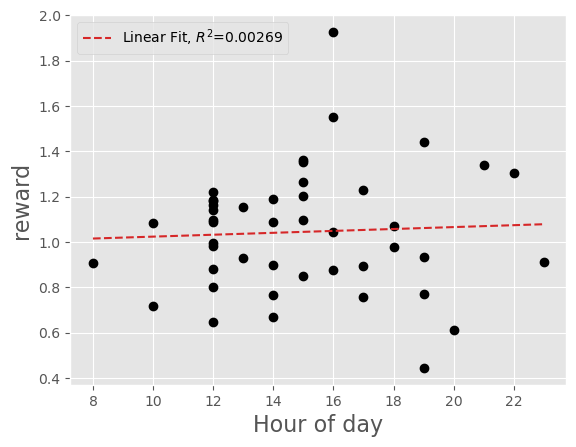

In [154]:
vals = form_responses["timestamp"].dt.hour[form_responses["timestamp"].notna()]
plt.plot(vals,subject_rewards[vals.index],"ko")
plt.xlabel("Hour of day")
plt.ylabel("reward")
x = np.linspace(vals.min(),vals.max(),100)
r = linear_fit(vals, subject_rewards[vals.index])
plot_linear_fit(x,r,plt.gca())
plt.legend()

(array([ 1.,  2., 12.,  2., 11.,  4.,  5.,  4.,  2.,  2.]),
 array([ 8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. , 21.5, 23. ]),
 <BarContainer object of 10 artists>)

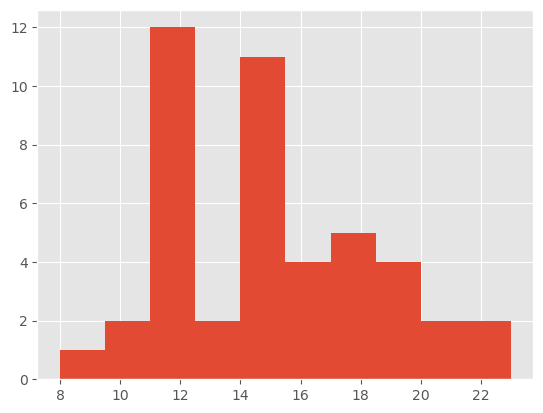

In [155]:
plt.hist(vals)

In [133]:
def compare_segment_rewards(col, queries, labels=None, ttest=True):
    assert len(queries) == 2
    segment_a = subject_rewards[form_responses.loc[form_responses[col] == queries[0]].index]
    plt.plot(np.zeros(segment_a.shape[0]),segment_a,'ko')
    plt.errorbar(0,segment_a.mean(),yerr=segment_a.std(),color='r',marker='o',elinewidth=1,capsize=10)
    
    segment_b = subject_rewards[form_responses.loc[form_responses[col] == queries[1]].index]
    plt.plot(np.ones(segment_b.shape[0]),segment_b,'ko')
    plt.errorbar(1,segment_b.mean(),yerr=segment_b.std(),color='r',marker='o',elinewidth=1,capsize=10)
    plt.ylabel("mean reward")
    plt.xticks(ticks=range(len(queries)),labels=labels)
    if ttest:
        stats = sp.stats.ttest_ind(segment_a,segment_b)
        print("p value: ",round(stats.pvalue*100,3),"%")

p value:  0.025 %


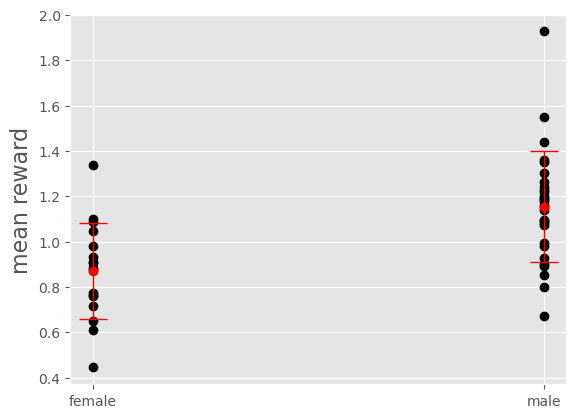

In [134]:
compare_segment_rewards("sex",["female","male"],labels=["female", "male"])

p value:  0.114 %


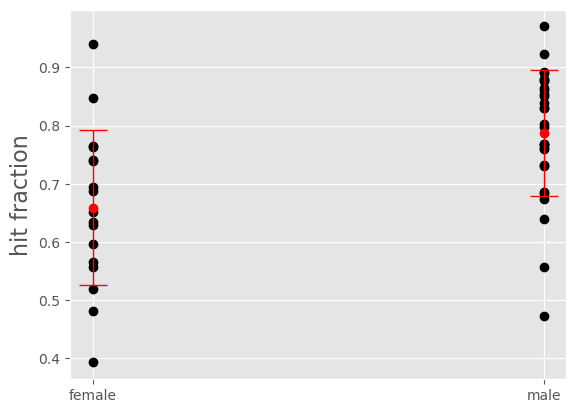

In [138]:
female_hfs = np.array([hit_fractions[i] for i in form_responses[form_responses["sex"] == "female"].index])
male_hfs = np.array([hit_fractions[i] for i in form_responses[form_responses["sex"] == "male"].index])

plt.plot(np.zeros(female_hfs.shape[0]),female_hfs,'ko')
plt.errorbar(0,female_hfs.mean(),yerr=female_hfs.std(),color='r',marker='o',elinewidth=1,capsize=10)

plt.plot(np.ones(male_hfs.shape[0]),male_hfs,'ko')
plt.errorbar(1,male_hfs.mean(),yerr=male_hfs.std(),color='r',marker='o',elinewidth=1,capsize=10)
plt.ylabel("hit fraction")
plt.xticks(ticks=[0,1], labels=["female","male"])

stats = sp.stats.ttest_ind(female_hfs,male_hfs)
print("p value: ",round(stats.pvalue*100,3),"%")

p value:  18.953 %


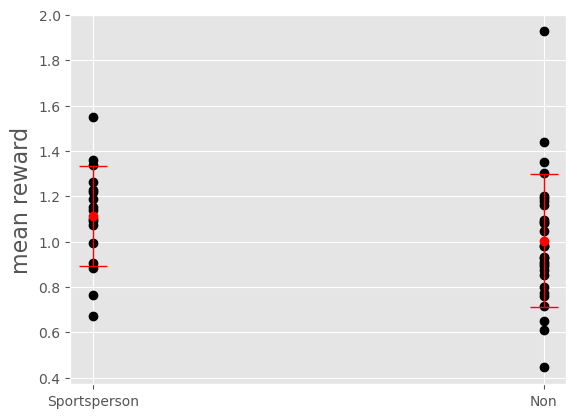

In [139]:
compare_segment_rewards("sports",[True,False],labels=["Sportsperson", "Non"])

p value:  70.381 %


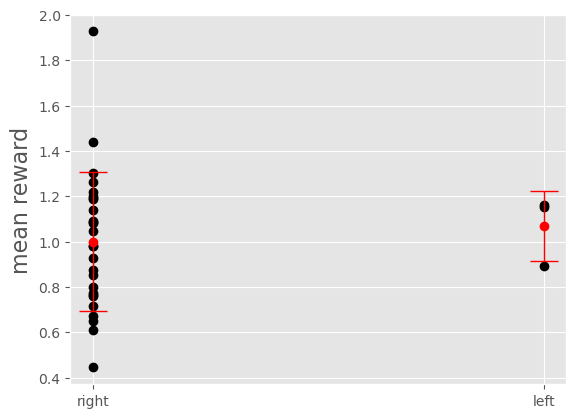

In [140]:
compare_segment_rewards("handedness",["right","left"],labels=["right", "left"])

p value:  19.429 %


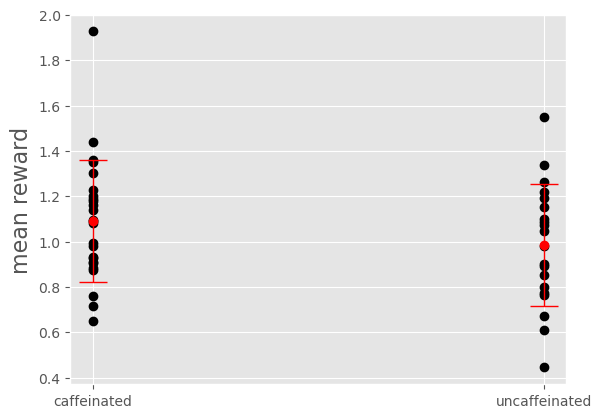

In [141]:
compare_segment_rewards("caffeine",[True,False],labels=["caffeinated","uncaffeinated"])

p value:  16.285 %


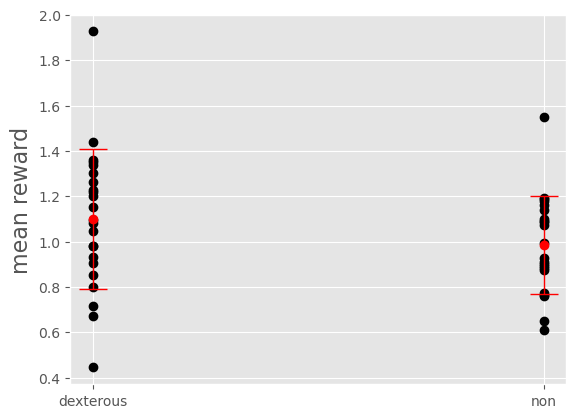

In [142]:
compare_segment_rewards("dexterity",[True, False],labels=["dexterous", "non"])